<a href="https://colab.research.google.com/github/Taehwi11/Q1_2022/blob/python/14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset=load_iris()
x_dataframe=pd.DataFrame(data=iris_dataset.data,columns=iris_dataset.feature_names)
y_dataframe=pd.DataFrame(data=iris_dataset.target,columns=['Species'])
iris_dataframe=pd.concat([x_dataframe,y_dataframe],axis=1)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(x_dataframe)
sc_iris=pd.DataFrame(scaler.transform(x_dataframe),columns=iris_dataset.feature_names)
iris_dataframe2=pd.concat([sc_iris,y_dataframe],axis=1)
iris_dataframe2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [9]:
from scipy.cluster.hierarchy import linkage
cluster=linkage(y=iris_dataframe2,method='single',metric='euclidean')

In [17]:
from scipy.cluster.hierarchy import fcluster
Cut_tree=fcluster(cluster,t=0.3,criterion='distance')
labels=iris_dataframe2['Species']
df=pd.DataFrame({'pred':Cut_tree,'labels':labels})
con_mat=pd.crosstab(df['pred'],df['labels'])
con_mat.head()
print(Cut_tree)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


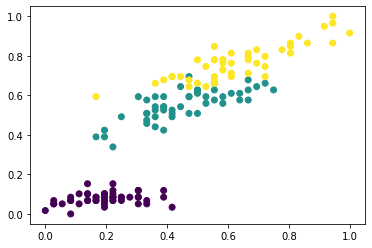

In [21]:
from matplotlib import pyplot as plt
iris_dataframe2['cluster']=Cut_tree
iris_dataframe2.head()
plt.scatter(x=iris_dataframe2['sepal length (cm)'],y=iris_dataframe2['petal length (cm)'],c=iris_dataframe2['cluster'])